In [1]:
from transformers import pipeline
import skimage
import numpy as np
from PIL import Image
from PIL import ImageDraw

## NLP

### Text classification

In [2]:
sentence = "We’ve done a lot since the lab launched in 1983 and we’re looking forward to what faculty and students contribute in the next 40 years"
classifier = pipeline(task="sentiment-analysis")
preds = classifier(sentence)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.9998, 'label': 'POSITIVE'}]

### Text summarization

In [3]:
originalText = """Over the years, a tradition has developed among our students, 
a gesture of goodwill and camaraderie in the face of academic stress. The offering of flowers and small items 
at the foot of our beloved Testudo statue at McKeldin Library has become a symbol of unity and a beacon of good luck 
during finals. This tradition reflects the spirit of our Terrapin community—our shared academic hopes, aspirations, 
and mutual support. However, with great regret, this tradition has devolved into a practice that does not reflect 
our Terrapin values. The items placed at Testudo have increasingly included bulk trash, alcohol, road signs, 
residence hall property, and other dangerous items. Many items placed have involved vandalism and theft of property. 
These actions have damaged university and private property, blocked sidewalks, and could cause harm."""

summarizer = pipeline(task="summarization")
output = summarizer(originalText, max_length=56)
output

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' The offering of flowers and small items at the foot of Testudo statue at McKeldin Library has become a symbol of unity and a beacon of good luck . Items placed at Testudo have increasingly included bulk trash, alcohol, road signs, and other dangerous items'}]

### Language modeling

In [4]:
text = "2023 Commencement Honors the ‘Terrapin Grit’ of <mask> of UMD Graduates"
fill_mask = pipeline(task="fill-mask")
preds = fill_mask(text, top_k=3)
preds

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.30552616715431213,
  'token': 12233,
  'token_str': ' Thousands',
  'sequence': '2023 Commencement Honors the ‘Terrapin Grit’ of Thousands of UMD Graduates'},
 {'score': 0.11154700815677643,
  'token': 13791,
  'token_str': ' Parents',
  'sequence': '2023 Commencement Honors the ‘Terrapin Grit’ of Parents of UMD Graduates'},
 {'score': 0.08045002818107605,
  'token': 11353,
  'token_str': ' Half',
  'sequence': '2023 Commencement Honors the ‘Terrapin Grit’ of Half of UMD Graduates'}]

In [5]:
text = """This booklet contains Symposium presentation <mask> and selected highlights of our
faculty and students’ news and accomplishments over the past year.""" 

fill_mask = pipeline(task="fill-mask")
preds = fill_mask(text, top_k=3)
preds

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.43327000737190247,
  'token': 19583,
  'token_str': ' slides',
  'sequence': 'This booklet contains Symposium presentation slides and selected highlights of our\nfaculty and students’ news and accomplishments over the past year.'},
 {'score': 0.15161967277526855,
  'token': 3183,
  'token_str': ' materials',
  'sequence': 'This booklet contains Symposium presentation materials and selected highlights of our\nfaculty and students’ news and accomplishments over the past year.'},
 {'score': 0.07523275911808014,
  'token': 2775,
  'token_str': ' notes',
  'sequence': 'This booklet contains Symposium presentation notes and selected highlights of our\nfaculty and students’ news and accomplishments over the past year.'}]

## Computer vision

### image classification

In [6]:
imgPath = "./testudo.jpeg"
classifier = pipeline(task="image-classification")
preds = classifier(imgPath)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.6363, 'label': "academic gown, academic robe, judge's robe"},
 {'score': 0.3149, 'label': 'mortarboard'},
 {'score': 0.0102, 'label': 'groom, bridegroom'},
 {'score': 0.0033, 'label': 'library'},
 {'score': 0.003, 'label': 'pedestal, plinth, footstall'}]

### zero-shot object detection

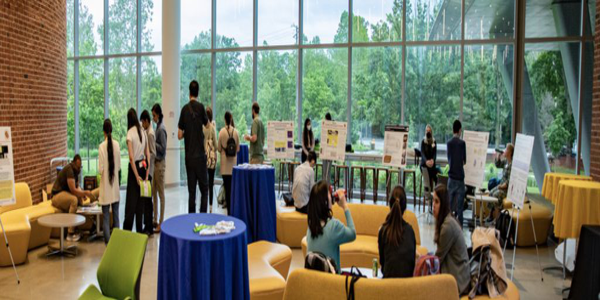

In [7]:
# load check-point
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

# load image
imgPath = "./symposiumPoster.jpeg"
image = Image.open(imgPath).resize((600, 300))
image = Image.fromarray(np.uint8(image)).convert("RGB")
image


In [8]:
# provide candidate labels
candidate_labels = ["poster", "yellow sofa", "green chair", "blue table cloth"]

predictions = detector(
    image,
    candidate_labels=candidate_labels,
)

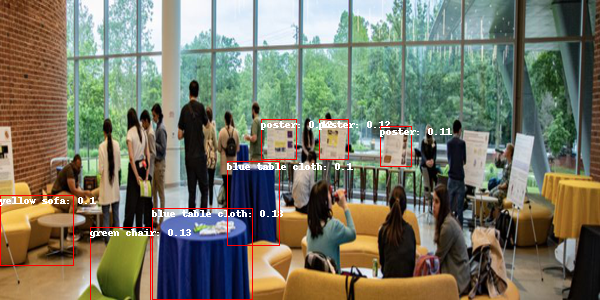

In [9]:
# visualize predictions
draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")
image